In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import plotter

## Importing data points
Generated by data_gen_determ_speed and data_gen_stoch_speed

In [27]:
f = open('data/det_speed.tsv', 'r')

r0_list, f_tips, s_tips = np.array([]), np.array([]), np.array([])
speeds, speed_FKPP, speed_lin = np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list = np.append(r0_list, float(line.split('\t')[0]))
    speeds = np.append(speeds, float(line.split('\t')[1]))
    f_tips = np.append(f_tips, float(line.split('\t')[2]))
    s_tips = np.append(s_tips, float(line.split('\t')[3]))
    speed_FKPP = np.append(speed_FKPP, float(line.split('\t')[4]))
    speed_lin = np.append(speed_lin, float(line.split('\t')[5]))
    
f.close()


f = open('data/stoch_speed.tsv', 'r')

r0_list_poiss, f_tips_poiss, s_tips_poiss = [], [], []
speeds_poiss = []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list_poiss = np.append(r0_list_poiss, float(line.split('\t')[0]))
    speeds_poiss = np.append(speeds_poiss, float(line.split('\t')[1]))
    f_tips_poiss = np.append(f_tips_poiss, float(line.split('\t')[2]))
    s_tips_poiss = np.append(s_tips_poiss, float(line.split('\t')[3]))
    
f.close()


f = open('data/stoch_speed_pars.tsv', 'r')
D = float(f.readlines()[1].split('\t')[1])
f.close()

## Panel A

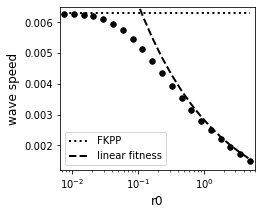

In [28]:
plt.figure(figsize=(3.5,3))

plt.xscale('log')
plt.xlabel('r0', fontsize=12)
plt.ylabel('wave speed', fontsize=12)
#plt.title(r'D=%.g, $\beta$=%.g, $\gamma$=%.g'%(D, 2, 1),fontsize=12)
plt.xlim(r0_list[0]-0.001, r0_list[-1]+1)
plt.ylim(0.0012,0.0065)


plt.scatter(r0_list, speeds, s=30, c='k')
plt.plot(r0_list, speed_FKPP, c='k', ls=':', label='FKPP', lw=2)
plt.plot(r0_list, speed_lin, c='k', ls='--', label='linear fitness', lw=2)
#plt.plot(r0_list, speed_impl, label='speed-tip relation', lw=2)
plt.legend()
plt.savefig('plots/speed_r0.svg', dpi=200)

## Panel B

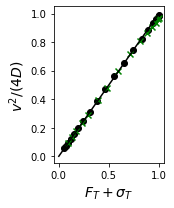

In [29]:
fig, ax1 = plt.subplots(1,1,figsize=(2.5,3))

speed_estim = f_tips - 2.3381*(D * s_tips**2)**(1/3)
speed_estim_stoch = f_tips_poiss - 2.3381*(D * s_tips_poiss**2)**(1/3)

ax1.scatter(speed_estim, speeds**2 / 4 / D, c='k')
ax1.scatter(speed_estim_stoch, speeds_poiss**2 / 4 / D, c='g', marker='x')
    
ax1.set_ylabel(r'$v^2 / (4 D)$', fontsize=14)
ax1.set_xlabel(r'$F_T + \sigma_T$', fontsize=14)

x = np.linspace(0,1)
ax1.plot(x, x, c='k')

plt.tight_layout()

plt.savefig('plots/speed_fitness_relation.svg')